<a href="https://colab.research.google.com/github/Udit-dutta/Udit-dutta/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
import zipfile

In [23]:
dataset='/content/face-mask-dataset.zip'
from zipfile import ZipFile
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Extracted")

Extracted


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [25]:
mask_files=os.listdir('/content/data/with_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_956.jpg', 'with_mask_798.jpg', 'with_mask_182.jpg', 'with_mask_2859.jpg', 'with_mask_2269.jpg']
['with_mask_828.jpg', 'with_mask_594.jpg', 'with_mask_420.jpg', 'with_mask_1812.jpg', 'with_mask_2914.jpg']


In [26]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_703.jpg', 'without_mask_3241.jpg', 'without_mask_2829.jpg', 'without_mask_3092.jpg', 'without_mask_1743.jpg']
['without_mask_3457.jpg', 'without_mask_1932.jpg', 'without_mask_3027.jpg', 'without_mask_2603.jpg', 'without_mask_106.jpg']


In [27]:
print(len(mask_files))
print(len(without_mask_files))

3725
3828


mask-> 1
without mask-> 0

In [28]:
mask_files_labels= [1]*3725
without_mask_files_labels=[0]*3828

In [29]:
print(mask_files_labels[0:5])
print(without_mask_files_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [30]:
labels=mask_files_labels+without_mask_files_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


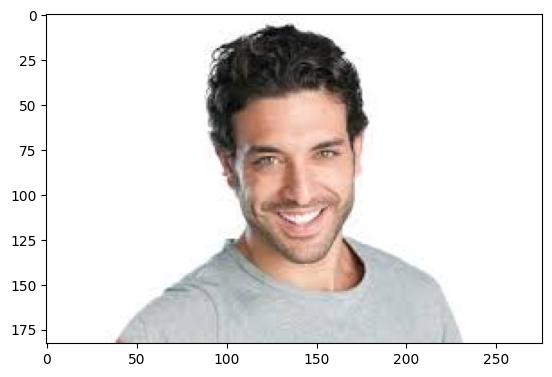

In [31]:
img=mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
plt.imshow(img)
plt.show()

Image processing

In [32]:
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [33]:
without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [34]:
print(len(data))

7553


In [37]:
x=np.array(data)
y=np.array(labels)

In [38]:
type(x)
type(y)

numpy.ndarray

In [39]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [41]:
x_train_scaled=x_train/255;
x_test_scaled=x_test/255

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
#architecture
num_of_classes=2

model= keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))



In [44]:
#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 137s 793ms/step - loss: 0.4682 - accuracy: 0.7918 - val_loss: 0.2876 - val_accuracy: 0.8694
Epoch 2/10
170/170 [==============================] - 136s 799ms/step - loss: 0.2988 - accuracy: 0.8814 - val_loss: 0.2231 - val_accuracy: 0.9008
Epoch 3/10
170/170 [==============================] - 133s 780ms/step - loss: 0.2561 - accuracy: 0.9009 - val_loss: 0.2331 - val_accuracy: 0.8926
Epoch 4/10
170/170 [==============================] - 131s 768ms/step - loss: 0.2144 - accuracy: 0.9123 - val_loss: 0.2129 - val_accuracy: 0.9091
Epoch 5/10
170/170 [==============================] - 131s 770ms/step - loss: 0.1810 - accuracy: 0.9272 - val_loss: 0.1758 - val_accuracy: 0.9223
Epoch 6/10
170/170 [==============================] - 134s 788ms/step - loss: 0.1647 - accuracy: 0.9358 - val_loss: 0.2001 - val_accuracy: 0.9107
Epoch 7/10
170/170 [==============================] - 133s 784ms/step - loss: 0.1388 - accuracy: 0.9445 - val_loss: 0.1926 -

In [46]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)

48/48 [==============================] - 14s 297ms/step - loss: 0.2311 - accuracy: 0.9292


In [47]:
print("Test accuraccy:",accuracy)

Test accuraccy: 0.9291859865188599


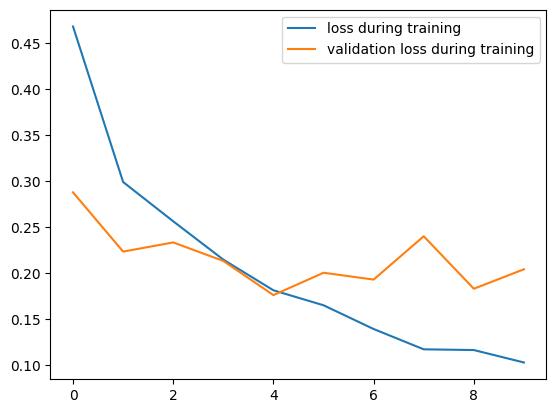

In [48]:
plt.plot(history.history['loss'],label='loss during training')
plt.plot(history.history['val_loss'],label='validation loss during training')
plt.legend()
plt.show()

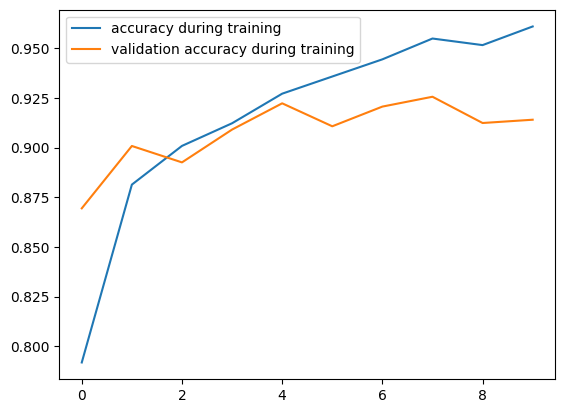

In [49]:
plt.plot(history.history['accuracy'],label='accuracy during training')
plt.plot(history.history['val_accuracy'],label='validation accuracy during training')
plt.legend()
plt.show()

**Building a predictivve system**

Path of the image/content/Lionel Messi.webp


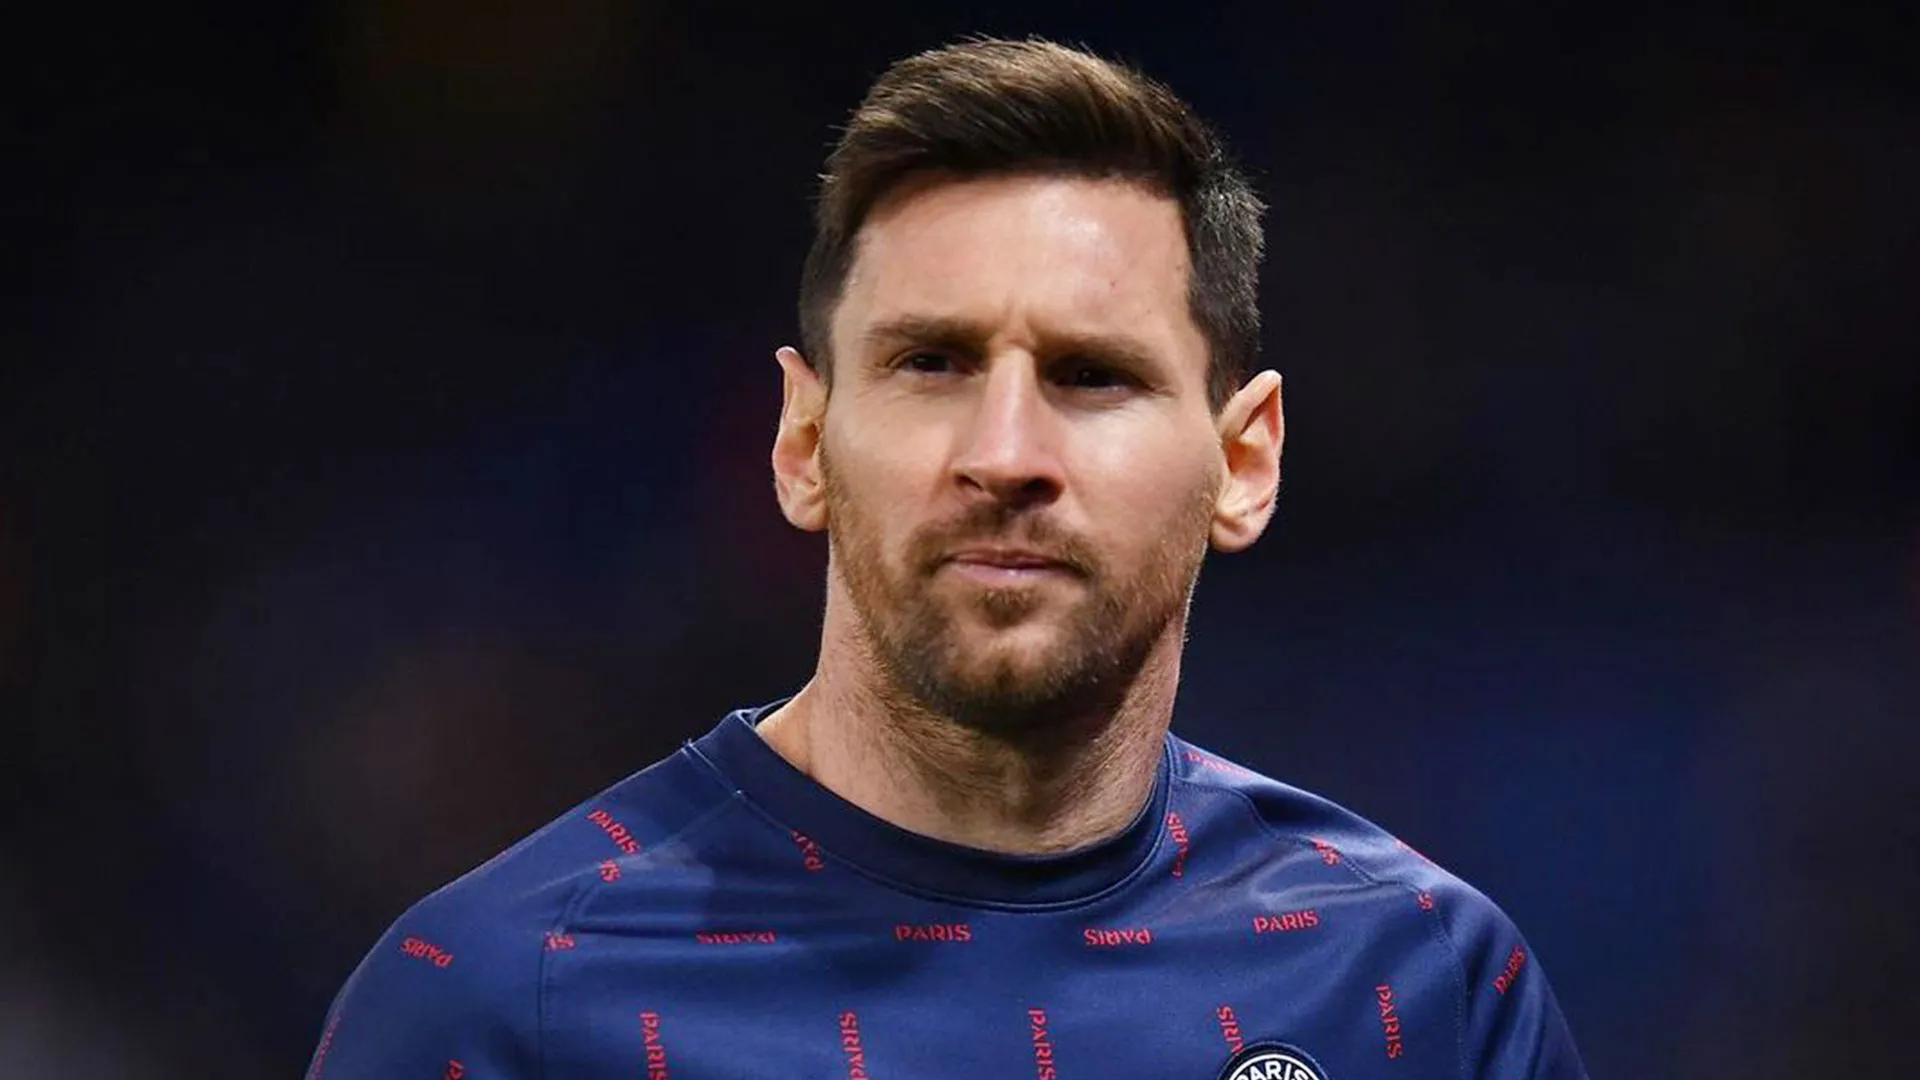

1/1 [==============================] - 0s 42ms/step
[[0.5870119 0.4034152]]
0
The person is not wearing a mask


In [57]:
input_image_path=input('Path of the image')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized= cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshape=np.reshape(input_image_scaled,[1,128,128,3])
prediction=model.predict(input_image_reshape)
print(prediction)
input_image_label=np.argmax(prediction)
print(input_image_label)


if(input_image_label==1):
  print("The person is wearing a mask")
else:
  print("The person is not wearing a mask")